In [1]:
import pandas as pd
import glob
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import re

import json

In [2]:
!pip install pyarrow

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### ConversationsFromUniversities refers to tweets posted by Universities under observation
### ConversationsMentioningUniversities refers to tweets mentioning those Universities 

In [5]:
ConversationsFromUniversities= pd.concat(map(pd.read_feather, glob.glob('../DataStore/ConversationsFromUniversities*.ftr')),ignore_index=True)

In [6]:
ConversationsMentioningUniversities= pd.concat(map(pd.read_feather, glob.glob('../DataStore/ConversationsMentioningUniversities*.ftr')),ignore_index=True)

#### We transform time-related columms to pandas datetime format

In [7]:
ConversationsFromUniversities['created_at']=pd.to_datetime(ConversationsFromUniversities['created_at'])
ConversationsFromUniversities['collection_timestamp']=pd.to_datetime(ConversationsFromUniversities['created_at']).dt.strftime('%Y-%m-%d')

In [8]:
ConversationsMentioningUniversities['created_at']=pd.to_datetime(ConversationsMentioningUniversities['created_at'])
ConversationsMentioningUniversities['collection_timestamp']=pd.to_datetime(ConversationsMentioningUniversities['created_at']).dt.strftime('%Y-%m-%d')

In [9]:
ConversationsFromUniversities.sample(3)

,created_at,possibly_sensitive,author_id,referenced_tweets,reply_settings,conversation_id,source,id,text,lang,...,geo.place_id,geo.place_type,geo.geo.type,geo.geo.bbox,geo.id,geo.full_name,geo.name,geo.country_code,geo.country,collection_timestamp
5836,2021-07-01 15:54:14+00:00,False,40234732,None,everyone,1410627817285509122,Twitter Web App,1410627817285509122,One in 11 males have carried or used a weapon ...,en,...,None,None,None,None,None,None,None,None,None,2021-07-01
3614,2021-09-20 16:29:01+00:00,False,48289662,None,everyone,1439989989841022977,Sprout Social,1439989989841022977,#COVID19 RESEARCH - New data shows those who a...,en,...,None,None,None,None,None,None,None,None,None,2021-09-20
5567,2021-07-13 11:36:50+00:00,False,48289662,None,everyone,1414911695353487363,Sprout Social,1414911695353487363,📣 We're hiring!\n\nStart a career in digital c...,en,...,None,None,None,None,None,None,None,None,None,2021-07-13


In [10]:
ConversationsMentioningUniversities.sample(3)

,lang,created_at,id,text,author_id,source,reply_settings,referenced_tweets,in_reply_to_user_id,conversation_id,...,geo.place_type,geo.country,geo.country_code,geo.full_name,in_reply_to_user.entities.description.cashtags,entities.cashtags,withheld.copyright,withheld.country_codes,author.withheld.country_codes,collection_timestamp
11752,en,2022-01-04 21:21:30+00:00,1478476709263552517,I would like to congratulate @jellings17 for h...,58092038,Twitter for iPhone,everyone,None,None,1478476709263552517,...,None,None,None,None,None,None,None,None,None,2022-01-04
2019,en,2022-01-09 18:43:03+00:00,1480248769593679874,RT @byFionaMacRae: Lovely to write about blood...,1219147511774007297,Twitter for Android,everyone,"[{'attachments': {'media': [{'alt_text': None,...",None,1480248769593679874,...,None,None,None,None,None,None,NaN,NaN,NaN,2022-01-09
13514,und,2022-01-04 10:32:23+00:00,1478313353198067721,@sajidjavid @UniofOxford @AstraZeneca https://...,1376878525588852740,Twitter for Android,everyone,"[{'attachments': {'media': [{'alt_text': None,...",20052899,1478284153271508997,...,None,None,None,None,None,None,None,None,None,2022-01-04


In [11]:
UniversityMetrics= pd.concat(map(pd.read_feather, glob.glob('../DataStore/UniversityMetrics*.ftr')),ignore_index=True)
UniversityMetrics['collection_timestamp']=pd.to_datetime(UniversityMetrics['collection_timestamp'], utc=True).dt.strftime('%Y-%m-%d')
UniversityMetricsResolver=UniversityMetrics.drop_duplicates(subset=['user.screen_name','user.id'])

In [12]:
UniversityMetrics.sample(3)

,user.screen_name,user.followers_count,user.favourites_count,user.friends_count,user.statuses_count,user.id,collection_timestamp
22,HarvardAlumni,49364,9033,10029,37251,19304974,2022-01-10
3,uclnews,54637,458,2230,11879,40234732,2022-01-06
8,IEuniversity,15732,3040,754,7648,16825188,2022-01-10


In [13]:
UniversityMetrics

,user.screen_name,user.followers_count,user.favourites_count,user.friends_count,user.statuses_count,user.id,collection_timestamp
0,IEuniversity,15642,3040,755,7639,16825188,2022-01-06
1,imperialcollege,148112,18789,3348,21010,15353955,2022-01-06
2,ucl,105531,4800,932,5492,322601789,2022-01-06
3,uclnews,54637,458,2230,11879,40234732,2022-01-06
4,UCLEvents,17286,415,471,3991,418725314,2022-01-06
5,MIT,1183108,1542,565,20611,15460048,2022-01-06
6,Stanford,877874,72,541,20631,18036441,2022-01-06
7,UniofOxford,785078,15385,1390,21836,48289662,2022-01-06
8,IEuniversity,15732,3040,754,7648,16825188,2022-01-10
9,IEAlumni,13471,2323,1088,10108,53099125,2022-01-10


In [14]:
### let's remove duplicates

UniversityMetrics.drop_duplicates(subset=['user.screen_name', 'collection_timestamp'], keep='last',inplace=True)


## Social Media Insights
### SMI1-4: Community on social media

In [15]:
SMI1Visualization=UniversityMetrics.pivot(index='user.screen_name',columns='collection_timestamp',values='user.followers_count')

In [16]:
SMI1Visualization

collection_timestamp,2022-01-06,2022-01-10
user.screen_name,,
Harvard,NaN,1315315.0
HarvardAlumni,NaN,49364.0
HarvardResearch,NaN,132882.0
IEAlumni,NaN,13471.0
IEuniversity,15642.0,15666.0
MIT,1183108.0,1183965.0
MIT_alumni,NaN,27019.0
Princeton,NaN,460887.0
Stanford,877874.0,878703.0


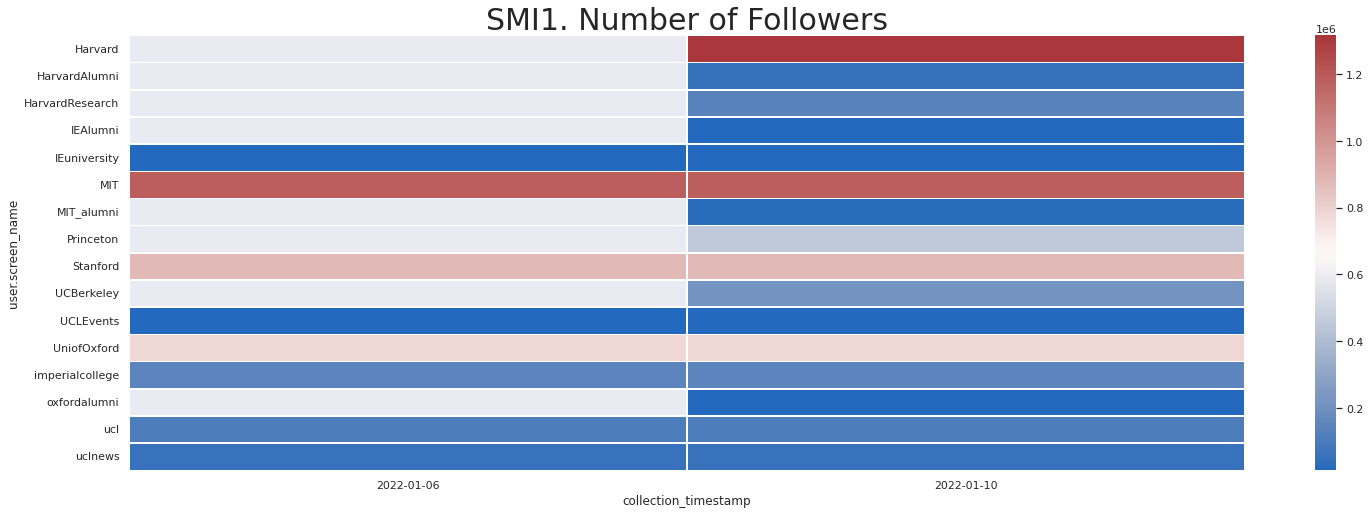

In [17]:
sns.color_palette("vlag", as_cmap=True)
sns.set(rc={'figure.figsize':(25,8)})
ax = sns.heatmap(SMI1Visualization, annot=False, fmt="d",linewidths=.5,cmap="vlag").set_title("SMI1. Number of Followers",fontsize=30)

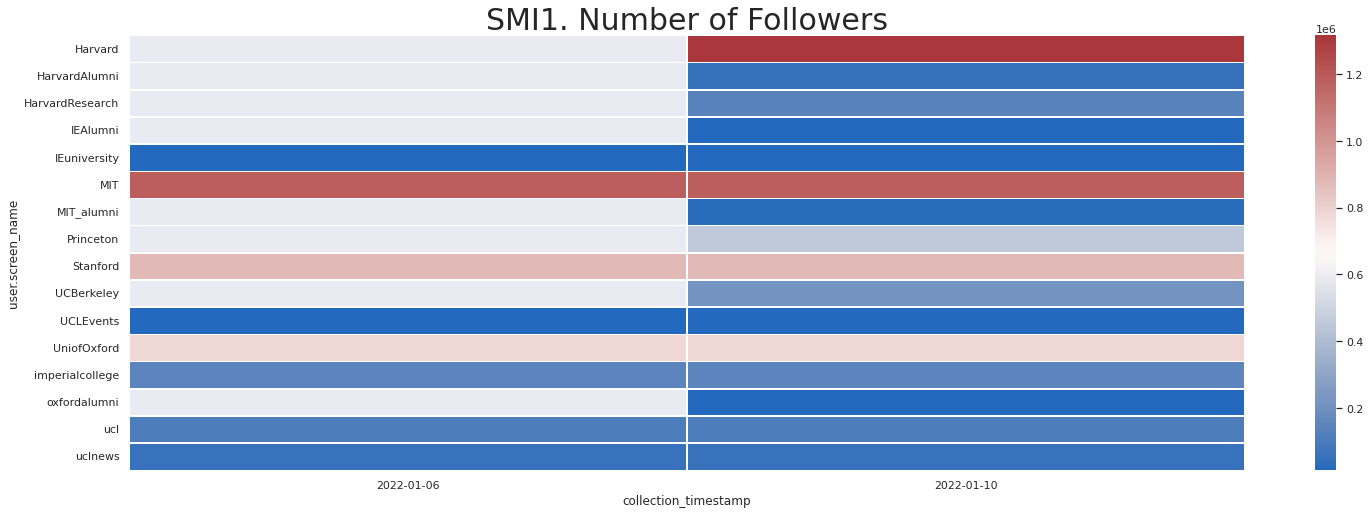

In [18]:
sns.color_palette("vlag", as_cmap=True)
sns.set(rc={'figure.figsize':(25,8)})
ax = sns.heatmap(SMI1Visualization, annot=False, fmt="d",linewidths=.5,cmap="vlag").set_title("SMI1. Number of Followers",fontsize=30)

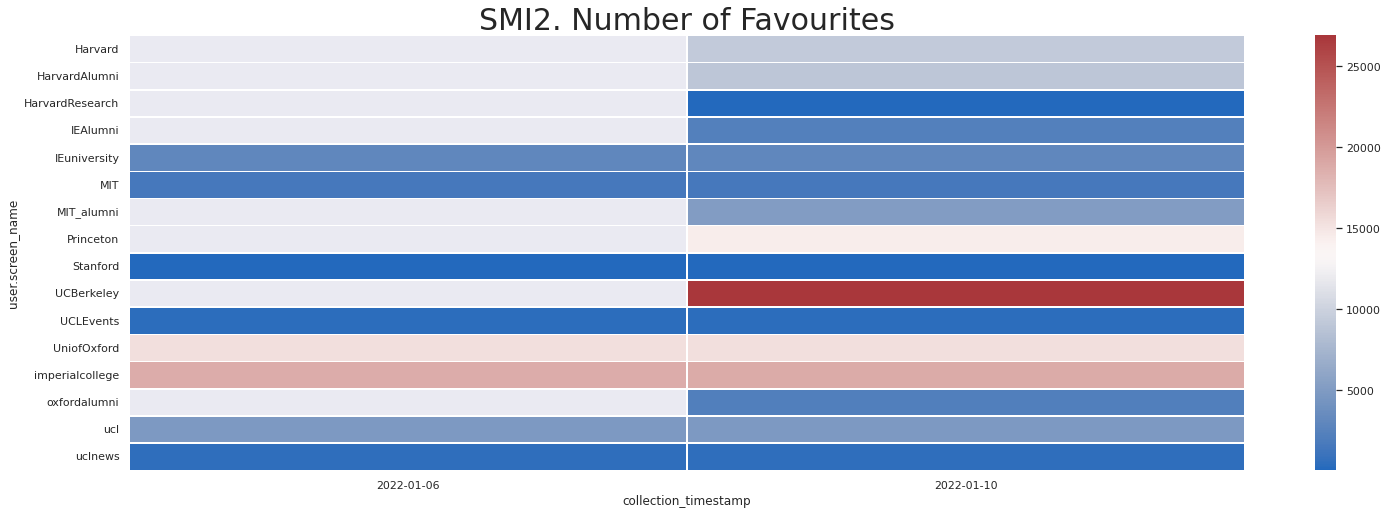

In [19]:
SMI2Visualization=UniversityMetrics.pivot(index='user.screen_name',columns='collection_timestamp',values='user.favourites_count')
sns.color_palette("vlag", as_cmap=True)
sns.set(rc={'figure.figsize':(25,8)})
ax = sns.heatmap(SMI2Visualization, annot=False, fmt="d",linewidths=.5,cmap="vlag").set_title("SMI2. Number of Favourites",fontsize=30)

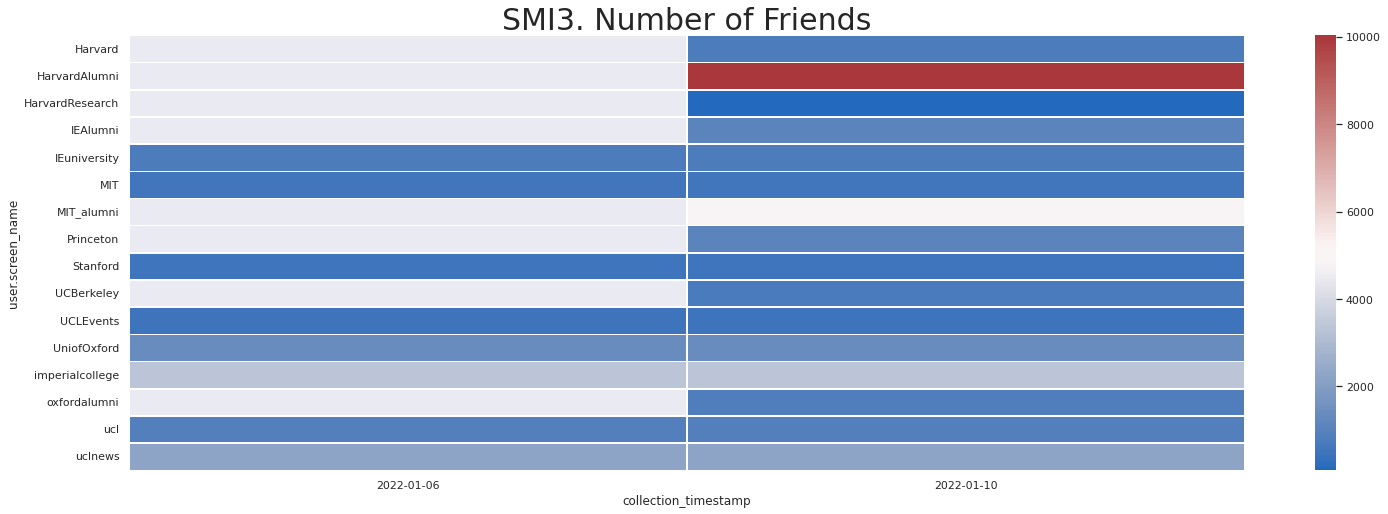

In [20]:
SMI3Visualization=UniversityMetrics.pivot(index='user.screen_name',columns='collection_timestamp',values='user.friends_count')
sns.color_palette("vlag", as_cmap=True)
sns.set(rc={'figure.figsize':(25,8)})
ax = sns.heatmap(SMI3Visualization, annot=False, fmt="d",linewidths=.5,cmap="vlag").set_title("SMI3. Number of Friends",fontsize=30)

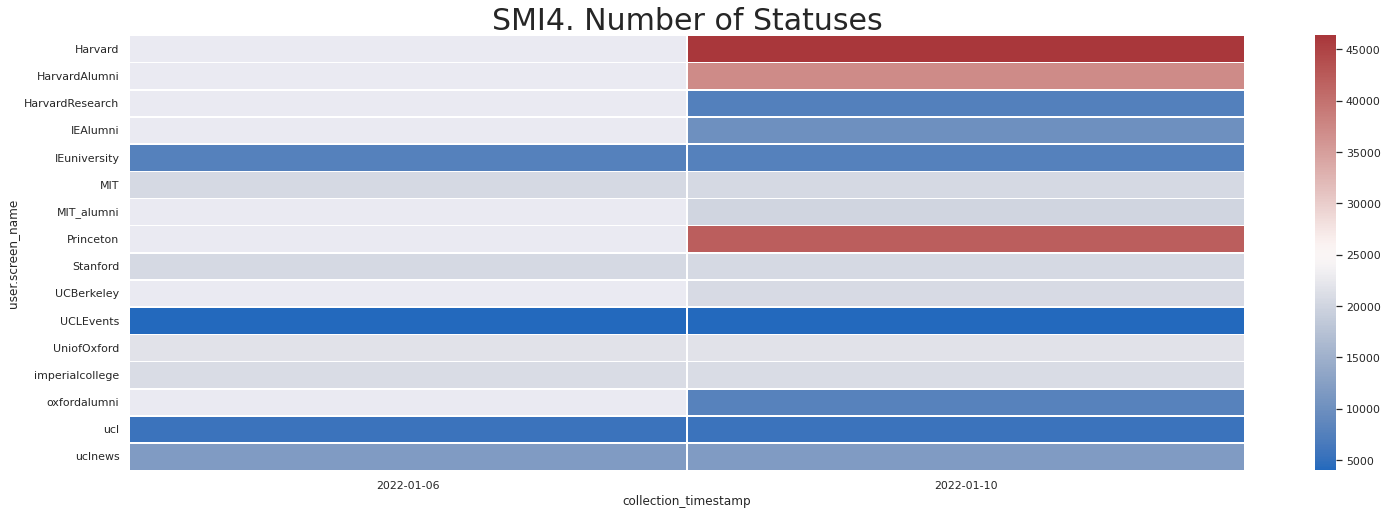

In [21]:
SMI4Visualization=UniversityMetrics.pivot(index='user.screen_name',columns='collection_timestamp',values='user.statuses_count')
sns.color_palette("vlag", as_cmap=True)
sns.set(rc={'figure.figsize':(25,8)})
ax = sns.heatmap(SMI4Visualization, annot=False, fmt="d",linewidths=.5,cmap="vlag").set_title("SMI4. Number of Statuses",fontsize=30)

### SMI5-6: Engagement

In [22]:
SMI5=ConversationsFromUniversities[['created_at', 'author.name','lang']].groupby([pd.Grouper(key='created_at', freq='M'),'author.name']).count().reset_index()

In [23]:
SMI5['collection_timestamp']=pd.to_datetime(SMI5['created_at']).dt.strftime('%Y-%m-%d')


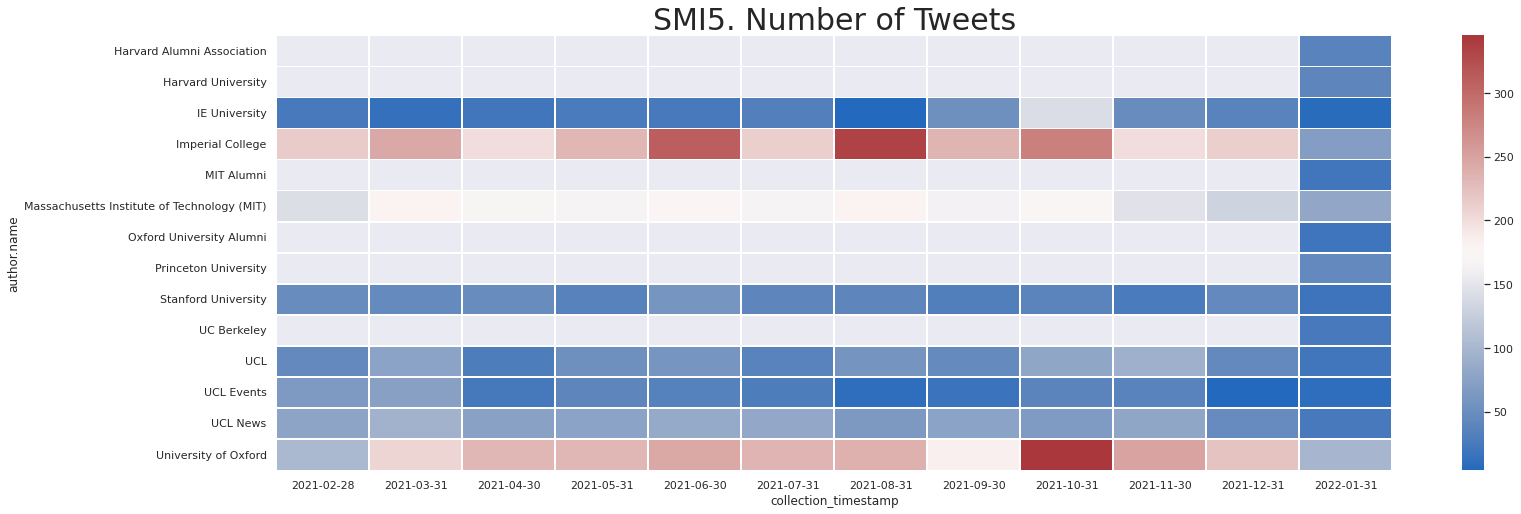

In [24]:
SMI5Visualization=SMI5.pivot(index='author.name',columns='collection_timestamp',values='lang')
sns.color_palette("vlag", as_cmap=True)
sns.set(rc={'figure.figsize':(25,8)})
ax = sns.heatmap(SMI5Visualization, annot=False, fmt="d",linewidths=.5,cmap="vlag").set_title("SMI5. Number of Tweets",fontsize=30)

### SMI6-7: Top Posts from Universities

In [25]:
indexesOfTopPosts=ConversationsFromUniversities.groupby('author.name')['public_metrics.retweet_count'].idxmax()

In [26]:
SMI6=ConversationsFromUniversities.iloc[indexesOfTopPosts]

In [27]:
SMI6['tweet.uri']=SMI6['id'].apply(lambda x: 'https://twitter.com/anyuser/status/'+ str(x))


In [28]:
SMI6Visualization=SMI6[['author.name','text','public_metrics.retweet_count','tweet.uri']]
SMI6Visualization

,author.name,text,public_metrics.retweet_count,tweet.uri
182,Harvard Alumni Association,How far will you go? #MondayMotivation https:/...,44,https://twitter.com/anyuser/status/14855912244...
227,Harvard University,The icy shores of the Charles River https://t....,60,https://twitter.com/anyuser/status/14848923946...
8815,IE University,"RT @AminaJMohammed: Signed, sealed and now to ...",50,https://twitter.com/anyuser/status/13740037019...
8838,Imperial College,#OnThisDay 1879: Scientist Maud Menten was bor...,397,https://twitter.com/anyuser/status/13731750126...
161,MIT Alumni,RT @ScienceMIT: By studying how mice interpret...,33,https://twitter.com/anyuser/status/14856588170...
2938,Massachusetts Institute of Technology (MIT),RT @NobelPrize: BREAKING NEWS: \nThe 2021 Sver...,5954,https://twitter.com/anyuser/status/14475029022...
136,Oxford University Alumni,RT @TORCHOxford: System Error: Where Big Tech ...,7,https://twitter.com/anyuser/status/14858947266...
387,Princeton University,RT @PUTIGERS: From Two-Sport Star To New-Sport...,32,https://twitter.com/anyuser/status/14838524475...
8447,Stanford University,RT @StanfordWBB: 𝐂𝐑𝐎𝐖𝐍 𝐓𝐇𝐄 𝐂𝐀𝐑𝐃𝐈𝐍𝐀𝐋 👑🌲\n\n#GoS...,1979,https://twitter.com/anyuser/status/13788627728...
453,UC Berkeley,RT @RigelRobinson: At his last Bay Area addres...,36,https://twitter.com/anyuser/status/14835114366...


In [29]:
SMI7=ConversationsMentioningUniversities.sort_values(by='public_metrics.retweet_count',ascending=False)
SMI7['tweet.uri']=SMI7['id'].apply(lambda x: 'https://twitter.com/anyuser/status/'+ str(x))
SMI7.drop_duplicates(subset=['text'],inplace=True)
SMI7Visualization=SMI7[['author.name','text','public_metrics.retweet_count','tweet.uri']].head(20)

### SMI6-7: Top Posts mentioning Universities

In [30]:
SMI7Visualization

,author.name,text,public_metrics.retweet_count,tweet.uri
6752,VernFن,"RT @DocteurGonzo4: Selon une étude du @MIT, ce...",2872,https://twitter.com/anyuser/status/14779355643...
1662,Aandolan Jivi Dentist,RT @EricTopol: No evidence that Omicron is les...,2653,https://twitter.com/anyuser/status/14803772710...
2848,פּרוֹטוֹן bnjb,RT @gijigae: これは日本でも拡散して欲しい。高校や大学を出なくてもオンライン授業...,1909,https://twitter.com/anyuser/status/14799924561...
10727,Patrick Verschuren,"RT @RobertKennedyJr: Peter Doshi, senior edito...",1492,https://twitter.com/anyuser/status/14787260919...
6260,Alan James AmonRA,RT @MIT: To stay connected and positive during...,1321,https://twitter.com/anyuser/status/14780592186...
9837,Gm,RT @mcuadramoreno: La Universidad de Oxford in...,1252,https://twitter.com/anyuser/status/14789129751...
2116,𝗥𝗶𝗻𝗻𝗮𝗵 𝗞𝗼𝗹𝗼𝗹𝗼,RT @SizweMpofuWalsh: I had to wait 18 months t...,990,https://twitter.com/anyuser/status/14802106245...
12119,TiaZ.,RT @ricpuglisi: Il curriculum tarocco di Gaeta...,807,https://twitter.com/anyuser/status/14784238736...
9471,axinte costel aurelian,RT @BorisJohnson: Incredibly exciting news the...,769,https://twitter.com/anyuser/status/14790401767...
14156,💫💎Crystalline💎💫,RT @ValaAfshar: @elonmusk @neuralink Arnav Kap...,621,https://twitter.com/anyuser/status/14781772855...


### SMI8-9: Social Media Amplification

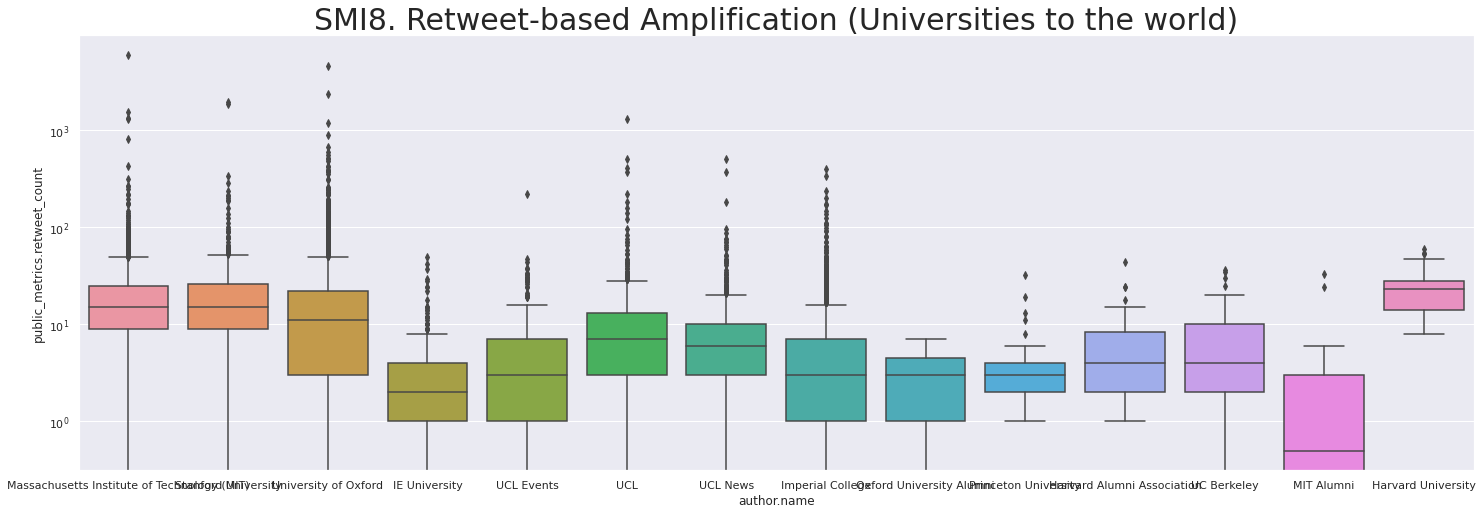

In [31]:
SMI8Visualization=ConversationsFromUniversities[['author.name','public_metrics.retweet_count']]
ax = sns.boxplot(x="author.name", y="public_metrics.retweet_count", data=SMI8Visualization).set_title("SMI8. Retweet-based Amplification (Universities to the world)",fontsize=30)
plt.yscale('log')

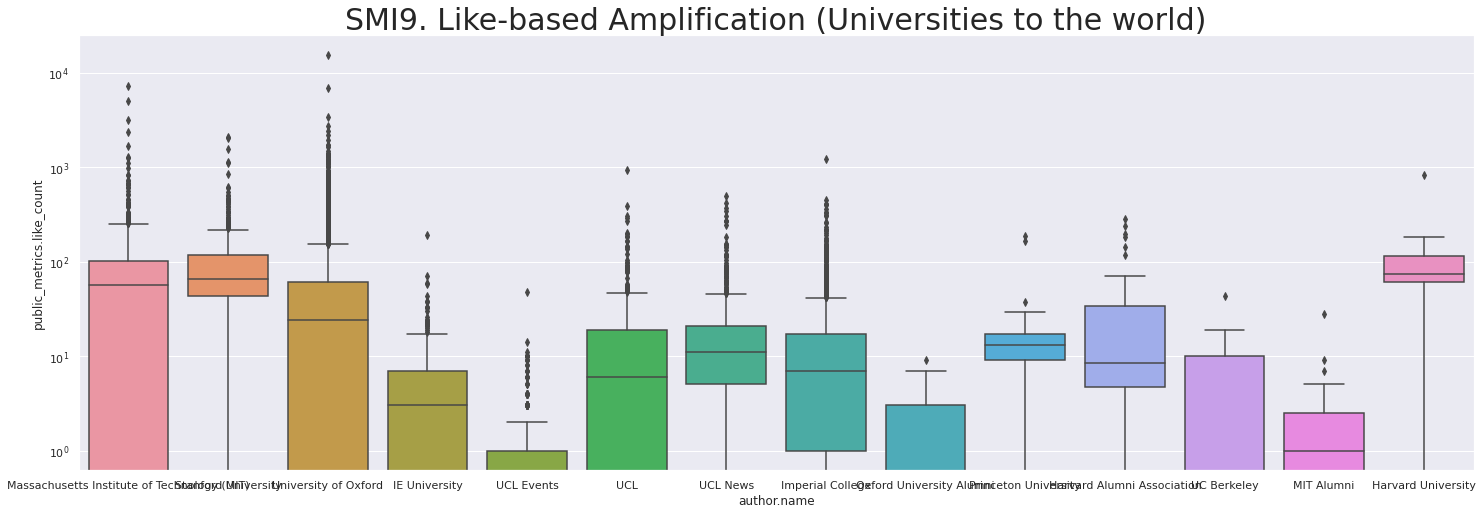

In [32]:
SMI9Visualization=ConversationsFromUniversities[['author.name','public_metrics.like_count']]
ax = sns.boxplot(x="author.name", y="public_metrics.like_count", data=SMI9Visualization).set_title("SMI9. Like-based Amplification (Universities to the world)",fontsize=30)
plt.yscale('log')

### SMI10-11: Top influencers.
#### An influencer is someone who mentions  a university and gets large levels of amplification

In [33]:
SMI10=ConversationsMentioningUniversities.sort_values(by='public_metrics.retweet_count',ascending=False)
SMI10['tweet.uri']=SMI10['id'].apply(lambda x: 'https://twitter.com/anyuser/status/'+ str(x))
SMI10.drop_duplicates(subset=['text'],inplace=True)


In [34]:
pd.set_option('display.max_rows', 100)
SMI10AmplifiedandIsRetweet=SMI10[(SMI10['public_metrics.retweet_count'] > SMI10['public_metrics.retweet_count'].quantile(.999))&SMI10['text'].str.startswith('RT')]

In [35]:
SMI10AmplifiedandIsRetweet

,lang,created_at,id,text,author_id,source,reply_settings,referenced_tweets,in_reply_to_user_id,conversation_id,...,geo.country,geo.country_code,geo.full_name,in_reply_to_user.entities.description.cashtags,entities.cashtags,withheld.copyright,withheld.country_codes,author.withheld.country_codes,collection_timestamp,tweet.uri
6752,fr,2022-01-03 09:31:11+00:00,1477935564351549440,"RT @DocteurGonzo4: Selon une étude du @MIT, ce...",498646546,Twitter for iPhone,everyone,"[{'attachments': None, 'author': {'created_at'...",None,1477935564351549440,...,None,None,None,None,None,NaN,NaN,NaN,2022-01-03,https://twitter.com/anyuser/status/14779355643...
1662,en,2022-01-10 03:13:40+00:00,1480377271026216960,RT @EricTopol: No evidence that Omicron is les...,1155017067591954432,Twitter for Android,everyone,"[{'attachments': {'media': [{'alt_text': None,...",None,1480377271026216960,...,None,None,None,None,None,NaN,NaN,NaN,2022-01-10,https://twitter.com/anyuser/status/14803772710...
2848,ja,2022-01-09 01:44:33+00:00,1479992456108478468,RT @gijigae: これは日本でも拡散して欲しい。高校や大学を出なくてもオンライン授業...,898979456,Twitter Web App,everyone,"[{'attachments': {'media': [{'alt_text': None,...",None,1479992456108478468,...,None,None,None,None,None,NaN,NaN,NaN,2022-01-09,https://twitter.com/anyuser/status/14799924561...
10727,en,2022-01-05 13:52:28+00:00,1478726091988779012,"RT @RobertKennedyJr: Peter Doshi, senior edito...",27714660,Twitter for Android,everyone,"[{'attachments': None, 'author': {'created_at'...",None,1478726091988779012,...,None,None,None,None,None,None,None,None,2022-01-05,https://twitter.com/anyuser/status/14787260919...
6260,en,2022-01-03 17:42:33+00:00,1478059218636877826,RT @MIT: To stay connected and positive during...,25062791,Twitter for iPhone,everyone,"[{'attachments': {'media': [{'alt_text': None,...",None,1478059218636877826,...,None,None,None,None,None,NaN,NaN,NaN,2022-01-03,https://twitter.com/anyuser/status/14780592186...
9837,es,2022-01-06 02:15:04+00:00,1478912975125848064,RT @mcuadramoreno: La Universidad de Oxford in...,1478552120420933634,Twitter for Android,everyone,"[{'attachments': None, 'author': {'created_at'...",None,1478912975125848064,...,None,None,None,None,None,None,None,None,2022-01-06,https://twitter.com/anyuser/status/14789129751...
2116,en,2022-01-09 16:11:28+00:00,1480210624508538882,RT @SizweMpofuWalsh: I had to wait 18 months t...,708276299631095809,Twitter for iPhone,everyone,"[{'attachments': {'media': [{'alt_text': None,...",None,1480210624508538882,...,None,None,None,None,None,NaN,NaN,NaN,2022-01-09,https://twitter.com/anyuser/status/14802106245...
12119,it,2022-01-04 17:51:33+00:00,1478423873616064517,RT @ricpuglisi: Il curriculum tarocco di Gaeta...,1051139369002835969,Twitter for iPhone,everyone,"[{'attachments': None, 'author': {'created_at'...",None,1478423873616064517,...,None,None,None,None,None,None,None,None,2022-01-04,https://twitter.com/anyuser/status/14784238736...


In [36]:
## we extract the first @user
SMI10AmplifiedandIsRetweet['tweet.source']=SMI10AmplifiedandIsRetweet['text'].apply(lambda x: re.findall("RT @([a-z0-9_]+)", x, re.I)[0])

In [37]:
SMI10Visualization=SMI10AmplifiedandIsRetweet.groupby('tweet.source').mean().sort_values(by='public_metrics.retweet_count',ascending=False).reset_index()

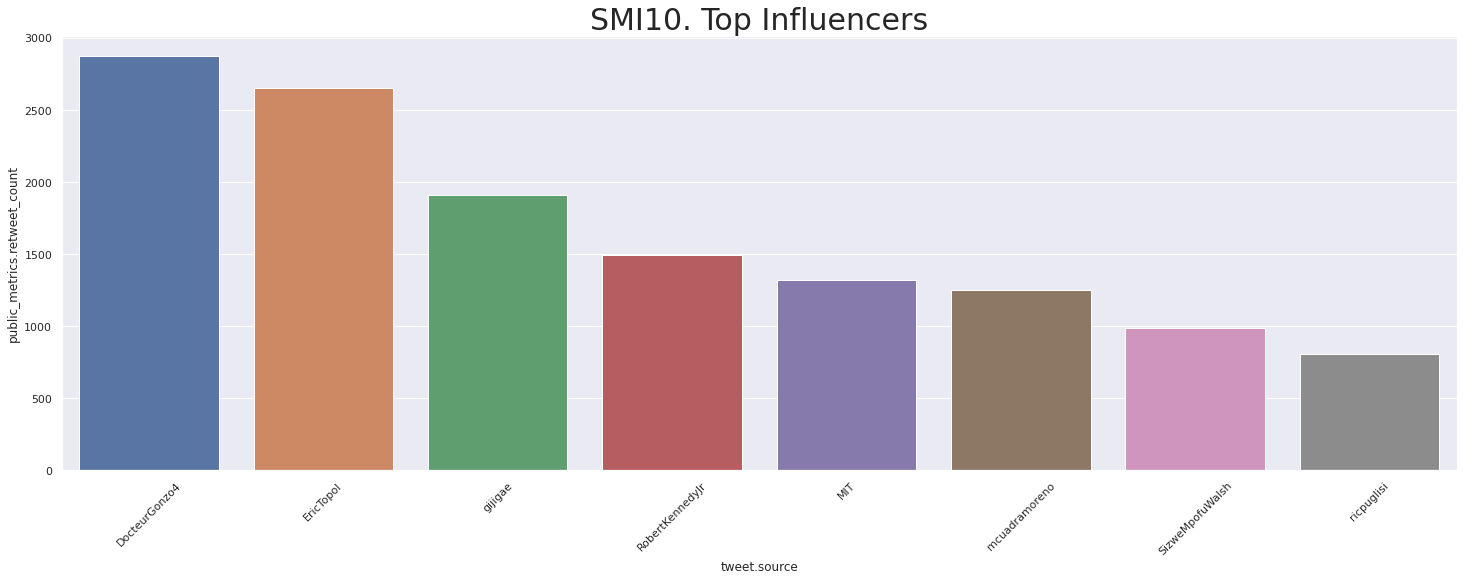

In [38]:
sns.barplot(data=SMI10Visualization,y='public_metrics.retweet_count',x='tweet.source').set_title("SMI10. Top Influencers",fontsize=30);
plt.xticks(rotation=45);